# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## OV


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_OV.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">September 27th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

    
- [x] $\textit{mutation effect label}$ prediction using Random Forest algorithm.
    

- [x] Classification will be $\textit{Disrupting vs (No effect + Increasing)}$.
    > $\textit{Disrupting} → 0$\
    > $\textit{No effect + Increasing} → 1$\
    > $\textit{Decreasing} → \textit{ignored}$
    
    
- [x] Evaluate the performane of the model.
    
- [x] We use SHAP in feature selection
    
    
- [x] Apply on Cancer Datasets
    > OV
     
- [x] We measure the impact of randomization by repeating whole experiment with multiple runs. 
    
- [x] We use Predator object to conduct experiments.
    
**Dependent files:**
* Training (mutations) data:
    - *training_data_M1.txt*


* Target (Cancer) data: 
    - *OV_Interface.txt*

In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import random
from pathlib import Path

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)
from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

NUM_EXPERIMENT_REPEAT = 50 # 10, 25, 50

SEED = 42
random.seed(SEED)
random_seeds = random.sample(range(1, 99999), NUM_EXPERIMENT_REPEAT)

# PATHS
PROJECT_COMMON_FILE_DIR = "../data/"
MUTATIONS_PATH = "training_data_M1.txt"
INITIAL_COLUMNS_PATH = "../data/initial_columns_59.csv"

OV_PATH = Path(r"../../My-ELASPIC-Web-API/Elaspic_Results/Merged_Results/OV_Interface_2021-09-28.txt")

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [2]:
from Predator import Predator

In [3]:
predator = Predator(
    project_common_file_dir=PROJECT_COMMON_FILE_DIR, 
    mutations_path=MUTATIONS_PATH, 
    tcga_code_path_pairs=[('ov', OV_PATH)],  # <-- this should be list of dictionaries. tcga_code_path_pairs=[{'brca', BRCA_PATH}]
    initial_columns_path=INITIAL_COLUMNS_PATH, 
    n_experiment=NUM_EXPERIMENT_REPEAT,
    eliminate_models=True
)

2021-09-28 04:41:51 | DEBUG    | Predator | Initializing Predator ..
2021-09-28 04:41:51 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `train_data` ..
2021-09-28 04:41:51 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `train_data_processed` ..
2021-09-28 04:41:51 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `ov` ..
2021-09-28 04:41:51 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_ov_data` ..


## Datasets

### Original Datasets

#### 1. Training Data: Mutations

In [4]:
display_data(predator.data_materials["train_data"])

Data dimensions: (1101, 104)


,Mutation_Effect_Label,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
1,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
2,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627


#### 2. TCGA Cancer Datasets

##### OV

In [5]:
display_data(predator.data_materials["ov"])

Data dimensions: (5086, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


### Processed Datasets

#### 1. Preprocessed Training Data 

In [6]:
display_data(predator.data_materials["train_data_processed"])

Data dimensions: (740, 62)


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,Q9BPZ3,F118A,P11940,1.0000,1.000000,1.0000,0.968750,1.21970,-0.092273,...,118.0,5.30636,3.79101,52.4675,52.4675,427.775,194.715,622.495,3.35293,3.35293
1,0,P01116,Y40C,P50749,0.9277,0.931315,0.3553,0.172500,2.07695,0.998749,...,329.0,47.61770,47.21160,70.2902,70.2461,464.470,400.030,864.505,3.07827,3.59123
2,0,Q96QK1,F534D,Q9UBQ0,1.0000,0.360743,1.0000,0.994505,2.69571,0.288297,...,453.0,68.21080,68.19710,59.2321,59.1774,510.690,298.820,809.510,3.03938,3.24435


Label counts:
Disrupting                540
Increasing + No Effect    200
Name: Mutation_Effect_Label, dtype: int64


,Mutation_Effect_Label,Counts
Disrupting,0,540
Increasing + No Effect,1,200


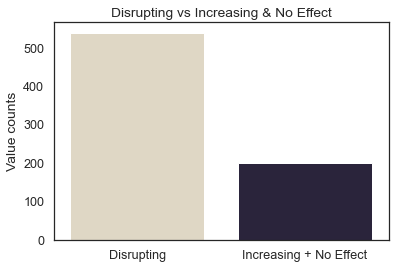

In [7]:
visualize_label_counts(predator.data_materials["train_data_processed"])
display_label_counts(predator.data_materials["train_data_processed"])

#### 2. Preprocessed TCGA Cancer Datasets

##### OV

In [8]:
display_data(predator.data_materials["target_ov_data"])

Data dimensions: (5086, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,D59E,P52565,0.9263,0.915529,0.9394,0.914711,1.492640,0.999329,0.046801,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.880,3.18062,3.18062
1,P08134,D59E,P52565-2,0.9263,0.915529,0.7222,0.708487,0.762694,0.999029,0.004062,...,344.0,62.3140,63.0691,32.5038,32.5038,598.710,417.740,1016.460,3.80414,3.80414
2,P62993,A3V,Q9H8V3-2,0.4444,0.463595,0.2792,0.262235,1.964490,-0.080548,0.456549,...,280.0,23.2774,24.5177,122.5120,122.5120,170.810,120.515,291.325,4.63364,4.63364


## Data Sampling with Unique Proteins

In [9]:
predator.sample_spsm()

2021-09-28 04:41:52 | DEBUG    | Predator | sampling ..


  0%|          | 0/50 [00:00<?, ?it/s]

In [10]:
predator.data_materials.keys()

dict_keys(['train_data', 'train_data_processed', 'ov', 'target_ov_data', 'sampled_train_data_list'])

In [11]:
predator.data_materials["sampled_train_data_list"][0].head()

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,Q9BPZ3,F118A,P11940,1.0000,1.000000,1.0000,0.968750,1.219700,-0.092273,...,118.0,5.30636,3.79101,52.4675,52.4675,427.775,194.715,622.495,3.35293,3.35293
1,0,P01116,Y40C,P50749,0.9277,0.931315,0.3553,0.172500,2.076950,0.998749,...,329.0,47.61770,47.21160,70.2902,70.2461,464.470,400.030,864.505,3.07827,3.59123
2,0,Q96QK1,T629D,Q9UBQ0-2,1.0000,0.360743,1.0000,0.973118,1.252190,0.403159,...,453.0,68.34290,68.21480,59.2629,59.2629,510.690,298.820,809.510,4.36339,4.34314
3,0,O43521-3,G66E,P10415-2,1.0000,0.714286,0.6505,0.435452,1.866070,-0.076393,...,181.0,2.15789,3.50531,30.7415,30.7626,421.875,272.215,694.090,3.41921,1.76365
4,1,Q13418,Q362H,Q9NVD7,0.9925,0.971054,1.0000,0.961240,0.621791,0.206189,...,391.0,60.07690,60.06430,33.8017,33.8017,406.135,174.195,580.330,3.39874,3.39874


In [12]:
# Number of sampled train data
len(predator.data_materials["sampled_train_data_list"])

50

### Label Distributions in Training Data

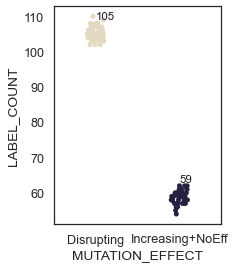

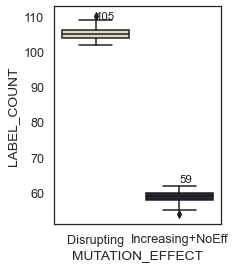

In [13]:
visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='strip')
visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='box')

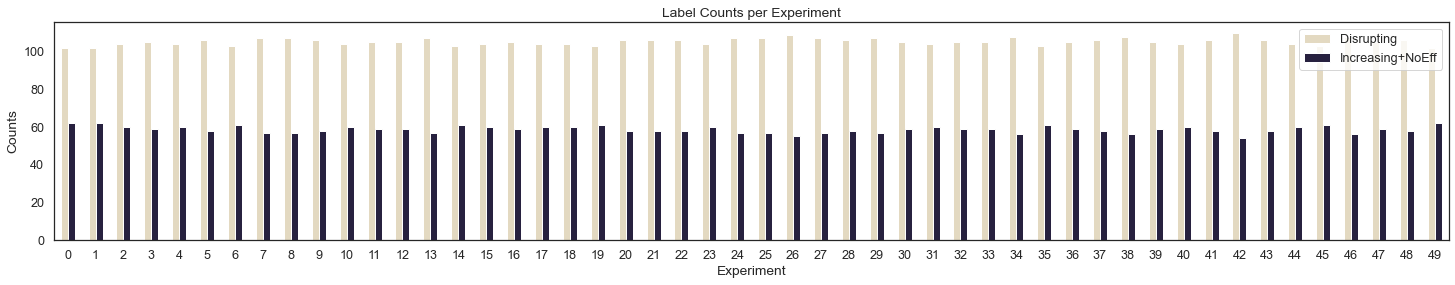

In [14]:
visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='bar')

## Preparing the Train Data Materials for Machine Learning Algorithms

In [15]:
predator.data_materials.keys()

dict_keys(['train_data', 'train_data_processed', 'ov', 'target_ov_data', 'sampled_train_data_list'])

In [16]:
predator.data_materials.prepare_model_data_materials()  # it will initialize Xs etc. too

2021-09-28 04:42:07 | DEBUG    | helpers.helpers_predator.data_materials | preparing datasets for ML ..
2021-09-28 04:42:07 | DEBUG    | helpers.helpers_predator.data_materials | Initializing model datasets ..


  0%|          | 0/50 [00:00<?, ?it/s]

2021-09-28 04:42:07 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-09-28 04:42:07 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-09-28 04:42:07 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-09-28 04:42:07 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-09-28 04:42:07 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-09-28 04:42:07 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-09-28 04:42:08 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-09-28 04:42:08 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-09-28 04:42:08 | DEBUG    | helpers.helpers_predator.data_materials | Appending data materials ..
2021-09-28 04:42:08 | DEBUG    | helpers.helpers_predator.data_materials 

In [17]:
print(len(predator.data_materials["Xs"]))
predator.data_materials["Xs"][0].head()

50


,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,EL2_score,Model/DOPE_score,Provean_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,1.0000,0.483871,0.9930,0.863124,5.977720,-0.103788,0.841449,1.551375,-0.805142,-8.790,...,316.0,8.64833,8.63232,90.3947,89.1921,524.985,258.980,783.96,2.46202,2.98422
1,1.0000,1.000000,0.4167,0.372027,1.700660,-0.116186,0.028181,-0.446740,0.127684,-7.998,...,249.0,27.72640,27.86500,139.5970,139.5970,386.025,245.065,631.09,3.57046,3.48332
2,0.6803,0.517968,0.4645,0.481888,0.937272,0.058100,0.165439,-0.028320,1.569780,-3.628,...,318.0,293.43500,294.70400,45.8003,45.8003,716.790,358.840,1075.62,4.33509,4.33509
3,0.9945,0.975130,0.9939,0.906319,1.511710,0.994536,0.171553,1.875893,-0.410594,-6.333,...,712.0,200.85600,199.44300,62.1484,62.1484,267.500,155.585,423.08,3.07379,3.07379
4,0.9032,0.902219,0.8519,0.838599,1.414480,0.156140,0.500075,1.100519,0.299283,-5.300,...,236.0,49.67150,48.43100,23.9715,23.9715,176.945,115.630,292.58,2.94553,5.48003


## Initial Insights

For each experiment, the models are fitted with 80% of training data and predictions are made for the remaining 20%. Then performance is evaluated comparing predictions with groundtruth labels.

In [18]:
predator.run_evaluate_valid(models_type='default')

2021-09-28 04:42:08 | DEBUG    | helpers.helpers_predator.evaluation | Training on train set and measuring performance by predicting on validation set.
2021-09-28 04:42:08 | DEBUG    | helpers.helpers_predator.evaluation | Evaluating with default models.


  0%|          | 0/50 [00:00<?, ?it/s]

-------- EXPERIMENT:  1 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6667
Balanced accuracy score : 0.5952
-------- EXPERIMENT:  2 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6970
Balanced accuracy score : 0.6190
-------- EXPERIMENT:  3 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6970
Balanced accuracy score : 0.6548
-------- EXPERIMENT:  4 --------
X_train.shape=(131, 58), y_train.shape=(131,), X_valid.shape=(33, 58), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.6970
Balanced accuracy score : 0.6012
-------- EXPERIMENT:  5 --------
X_train.shape=(131, 58), y_trai

In [19]:
from helpers.helpers_predator.visualizers import visualize_accuracy_metrics

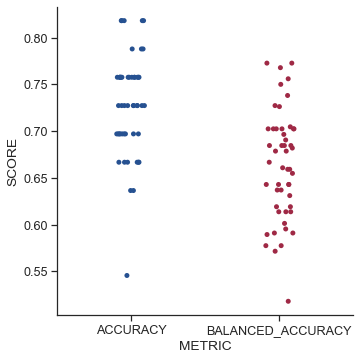

In [20]:
visualize_accuracy_metrics(
    predator.eval_valid.scores["initial_scoring"]["acc_scores"], 
    predator.eval_valid.scores["initial_scoring"]["balan_acc_scores"],
    kind='strip'
)

## SHAP Feature Importance Ranking

In [21]:
# shap_top_ns = [10, 20]
shap_top_ns = [5, 10, 20, 30, 40]

In [22]:
predator.init_shap_feature_selector(shap_top_ns)

2021-09-28 04:42:19 | DEBUG    | helpers.helpers_predator.feature_selection | Initializing ShapFeatureSelector ..


2021-09-28 04:42:19 | DEBUG    | helpers.helpers_predator.feature_selection | Loading ShapFeatureSelector ..


  0%|          | 0/50 [00:00<?, ?it/s]

 === SELECTED FEATURES === 
 --- SHAP TOP 5 ---
Experiment 1
['Provean_score', 'EL2_score', 'Matrix_score', 'electrostatics_mut', 'Final_ddG']

Experiment 2
['Provean_score', 'EL2_score', 'Final_ddG', 'solvation_polar_wt', 'entropy_mainchain_wt']

Experiment 3
['EL2_score', 'Final_ddG', 'Provean_score', 'Interface_contact_distance_mut', 'Interface_contact_distance_wt']

Experiment 4
['EL2_score', 'Provean_score', 'Final_ddG', 'Interface_contact_distance_mut', 'entropy_sidechain_mut']

Experiment 5
['EL2_score', 'Provean_score', 'Final_ddG', 'sidechain_hbond_mut', 'Solvent_accessibility_wt']

Experiment 6
['Final_ddG', 'EL2_score', 'Provean_score', 'solvation_polar_mut', 'solvation_polar_wt']

Experiment 7
['EL2_score', 'Provean_score', 'Final_ddG', 'Matrix_score', 'electrostatics_mut']

Experiment 8
['EL2_score', 'Provean_score', 'Final_ddG', 'Solvent_accessibility_mut', 'pcv_vdW_self_wt']

Experiment 9
['Provean_score', 'EL2_score', 'Final_ddG', 'Matrix_score', 'ProteinSolver_score']


## Aggregated Feature Selection

In [23]:
predator.aggregate_selected_features('occurrence')

2021-09-28 04:42:31 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=5]..
2021-09-28 04:42:32 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=10]..
2021-09-28 04:42:32 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=20]..
2021-09-28 04:42:32 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=30]..
2021-09-28 04:42:32 | DEBUG    | helpers.helpers_predator.data_materials | Initialize feature selected data materials [n_top=40]..


In [24]:
predator.shap_feature_selector.aggregated_feature_selector.n_features_to_selected_features_occurrences_counts

defaultdict(dict,
            {5: defaultdict(int,
                         {'Provean_score': 49,
                          'EL2_score': 50,
                          'Matrix_score': 22,
                          'electrostatics_mut': 2,
                          'Final_ddG': 46,
                          'solvation_polar_wt': 4,
                          'entropy_mainchain_wt': 3,
                          'Interface_contact_distance_mut': 5,
                          'Interface_contact_distance_wt': 1,
                          'entropy_sidechain_mut': 1,
                          'sidechain_hbond_mut': 1,
                          'Solvent_accessibility_wt': 8,
                          'solvation_polar_mut': 3,
                          'Solvent_accessibility_mut': 9,
                          'pcv_vdW_self_wt': 1,
                          'ProteinSolver_score': 2,
                          'Interactor_alignment_score': 22,
                          'entropy_sidechain_wt': 3,
    

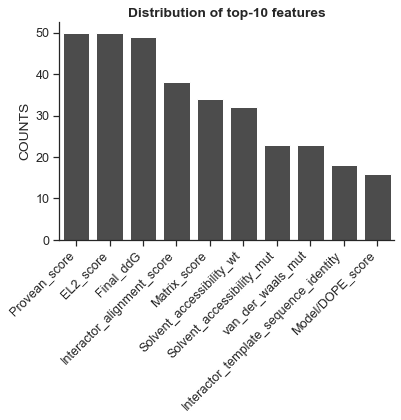

In [25]:
from helpers.helpers_predator.visualizers import visualize_distribution_top_n_features

visualize_distribution_top_n_features(predator.shap_feature_selector, 10)  # available for each shap_top_ns.

In [26]:
predator.shap_feature_selector.display_rankings(10, extract=True)

2021-09-28 04:42:33 | DEBUG    | helpers.helpers_predator.feature_selection | Displaying rankings ..
2021-09-28 04:42:33 | DEBUG    | helpers.helpers_predator.feature_selection | Extracting rankings ..
2021-09-28 04:42:33 | INFO     | helpers.helpers_predator.feature_selection | Rankings are extracted to file rankings_10.csv.


,0,1,2,3,4,5,6,7,8,9
0,Provean_score,EL2_score,Matrix_score,electrostatics_mut,Final_ddG,Interactor_alignment_score,Solvent_accessibility_mut,Model/DOPE_score,van_der_waals_mut,pcv_vdW_self_wt
1,Provean_score,EL2_score,Final_ddG,solvation_polar_wt,entropy_mainchain_wt,sidechain_hbond_mut,Solvent_accessibility_mut,Solvent_accessibility_wt,van_der_waals_mut,Model/DOPE_score
2,EL2_score,Final_ddG,Provean_score,Interface_contact_distance_mut,Interface_contact_distance_wt,entropy_sidechain_wt,Solvent_accessibility_mut,entropy_sidechain_mut,pcv_vdW_wt,Interactor_alignment_score
3,EL2_score,Provean_score,Final_ddG,Interface_contact_distance_mut,entropy_sidechain_mut,Interactor_template_sequence_identity,van_der_waals_mut,Interface_contact_distance_wt,sidechain_hbond_wt,Model/DOPE_score
4,EL2_score,Provean_score,Final_ddG,sidechain_hbond_mut,Solvent_accessibility_wt,Matrix_score,entropy_sidechain_mut,entropy_sidechain_wt,sidechain_hbond_wt,Interactor_template_sequence_identity


In [27]:
predator.shap_feature_selector.n_features_to_aggregated_features

{5: ['EL2_score',
  'Provean_score',
  'Final_ddG',
  'Matrix_score',
  'Interactor_alignment_score'],
 10: ['Provean_score',
  'EL2_score',
  'Final_ddG',
  'Interactor_alignment_score',
  'Matrix_score',
  'Solvent_accessibility_wt',
  'Solvent_accessibility_mut',
  'van_der_waals_mut',
  'Interactor_template_sequence_identity',
  'Model/DOPE_score'],
 20: ['Provean_score',
  'EL2_score',
  'Final_ddG',
  'Interactor_alignment_score',
  'van_der_waals_mut',
  'Matrix_score',
  'Solvent_accessibility_wt',
  'Solvent_accessibility_mut',
  'Interactor_template_sequence_identity',
  'Model/DOPE_score',
  'entropy_sidechain_mut',
  'electrostatics_mut',
  'ProteinSolver_score',
  'ProtBert_score',
  'solvation_polar_wt',
  'entropy_mainchain_wt',
  'solvation_polar_mut',
  'entropy_sidechain_wt',
  'pcv_vdW_self_wt',
  'Interface_contact_distance_mut'],
 30: ['Provean_score',
  'EL2_score',
  'Final_ddG',
  'Interactor_alignment_score',
  'van_der_waals_mut',
  'Solvent_accessibility_wt',

In [28]:
predator.shap_feature_selector.n_features_to_aggregated_features[10]

['Provean_score',
 'EL2_score',
 'Final_ddG',
 'Interactor_alignment_score',
 'Matrix_score',
 'Solvent_accessibility_wt',
 'Solvent_accessibility_mut',
 'van_der_waals_mut',
 'Interactor_template_sequence_identity',
 'Model/DOPE_score']

## Evaluation Metrics

In [29]:
from helpers.helpers_predator.evaluation import evaluate_metrics

In [30]:
predator.initialize_evaluation_metrics()

2021-09-28 04:42:34 | INFO     | helpers.helpers_predator.evaluation | Initializing EvaluationMetrics..
2021-09-28 04:42:34 | INFO     | helpers.helpers_predator.evaluation | Initialize_benchmark_dataframes ..


<div class="alert alert-block" style="background-color: white; border: 2px solid; padding: 10px; border-color: #F57C00">
    <b style="color: #F57C00"><i class="fa fa-warning" aria-hidden="true"></i>&nbsp; Warning</b><br>
<div>
    
Evaluation will take a long time.

In [ ]:
raise

In [ ]:
predator.eval_metrics.run_eval_metrics(n_repeats=1, n_jobs=5, verbose=True)
# todo
# predator.run_evaluation_metrics(n_repeats=5, n_jobs=4, verbose=True)

In [ ]:
predator.eval_metrics.scoring_metrics_data

|                   |  Provean |      $\Delta\Delta$G | All Columns | SHAP Columns (5) | SHAP Columns (10) | SHAP Columns (20) | SHAP Columns (30) | SHAP Columns (40) |
|------------------:|---------:|---------:|------------:|-----------------:|------------------:|------------------:|------------------:|------------------:|
|          **accuracy** | 0.610760 | 0.593208 |    0.714452 |         0.709600 |          0.731082 |          0.730880 |          0.723732 |          0.721166 |
| **balanced_accuracy** | 0.581348 | 0.553346 |    0.646770 |         0.658926 |          0.684346 |          0.680468 |          0.667830 |          0.660290 |
|                **f1** | 0.457686 | 0.419508 |    0.488514 |         0.524742 |          0.548794 |          0.547668 |          0.527700 |          0.505250 |
|          **f1_macro** | 0.571148 | 0.546018 |    0.636866 |         0.660598 |          0.679270 |          0.676998 |          0.659292 |          0.654624 |
|          **f1_micro** | 0.614980 | 0.589080 |    0.711412 |         0.717540 |          0.732424 |          0.733220 |          0.726720 |          0.721122 |
|         **precision** | 0.474758 | 0.432868 |    0.671394 |         0.652346 |          0.688832 |          0.693074 |          0.673812 |          0.669226 |
|   **precision_macro** | 0.595020 | 0.560870 |    0.696782 |         0.703838 |          0.721984 |          0.737650 |          0.722108 |          0.710566 |
|   **precision_micro** | 0.612284 | 0.595524 |    0.713366 |         0.715992 |          0.734674 |          0.735460 |          0.726382 |          0.720640 |
|            **recall** | 0.479600 | 0.428800 |    0.414700 |         0.494300 |          0.506600 |          0.485700 |          0.469800 |          0.429400 |
|           **roc_auc** | 0.636772 | 0.609460 |    0.738156 |         0.745736 |          0.763738 |          0.762828 |          0.758032 |          0.752386 |

In [ ]:
predator.eval_metrics.plot_performance_comparison_results()

In [ ]:
predator.eval_metrics.plot_performance_comparison_results()

## Fine Tuning

Fine Tuning on 80% of data (training *set*)

In [31]:
determined_feature_set = "shap_10"
predator.set_determined_feature_set(determined_feature_set)

2021-09-28 04:42:34 | DEBUG    | Predator | Setting determined feature set to `shap_10`.
2021-09-28 04:42:34 | DEBUG    | Predator | Setting determined features to 
['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'Model/DOPE_score'].


In [32]:
predator.run_hyperparameter_search(
    n_iter=1,
    n_repeats_cv=1,
    n_jobs=4,
    verbose=0,
    search_type="randomized",
    param_grid_level=0
)

2021-09-28 04:42:34 | DEBUG    | helpers.helpers_predator.fine_tuning | Running randomized search for each experiment ..
2021-09-28 04:42:34 | DEBUG    | helpers.helpers_predator.fine_tuning | PARAM_GRID: {'max_depth': [2, 5, 10], 'n_estimators': [10, 25, 50, 75, 100, 200, 400], 'min_samples_split': [2, 5], 'max_features': ['auto', 'sqrt', None], 'class_weight': ['balanced', None]}


  0%|          | 0/50 [00:00<?, ?it/s]

In [33]:
predator.fine_tuner.classifiers_attributes_data.head()

,best_params_,best_estimator_,best_score_
EXP_1,"{'n_estimators': 50, 'min_samples_split': 5, '...","(DecisionTreeClassifier(max_depth=2, min_sampl...",0.677083
EXP_2,"{'n_estimators': 10, 'min_samples_split': 2, '...","(DecisionTreeClassifier(max_depth=5, max_featu...",0.665694
EXP_3,"{'n_estimators': 25, 'min_samples_split': 5, '...","(DecisionTreeClassifier(max_depth=10, max_feat...",0.704028
EXP_4,"{'n_estimators': 75, 'min_samples_split': 5, '...","(DecisionTreeClassifier(max_depth=10, min_samp...",0.631111
EXP_5,"{'n_estimators': 25, 'min_samples_split': 2, '...","(DecisionTreeClassifier(max_depth=10, max_feat...",0.688472


In [34]:
predator.fine_tuner.best_estimators[:5]

[RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                        min_samples_split=5, n_estimators=50, random_state=1),
 RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2),
 RandomForestClassifier(class_weight='balanced', max_depth=10,
                        max_features='sqrt', min_samples_split=5,
                        n_estimators=25, random_state=3),
 RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=None,
                        min_samples_split=5, n_estimators=75, random_state=4),
 RandomForestClassifier(class_weight='balanced', max_depth=10,
                        max_features='sqrt', n_estimators=25, random_state=5)]

In [35]:
len(predator.tuned_models)

50

In [36]:
predator.tuned_models[:5]

[RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                        min_samples_split=5, n_estimators=50, random_state=1),
 RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2),
 RandomForestClassifier(class_weight='balanced', max_depth=10,
                        max_features='sqrt', min_samples_split=5,
                        n_estimators=25, random_state=3),
 RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=None,
                        min_samples_split=5, n_estimators=75, random_state=4),
 RandomForestClassifier(class_weight='balanced', max_depth=10,
                        max_features='sqrt', n_estimators=25, random_state=5)]

In [37]:
predator.fine_tuner.best_estimators[:5] == predator.tuned_models[:5]

True

In [38]:
predator.default_models[0]

RandomForestClassifier(random_state=42)

In [39]:
len(predator.tuned_models)

50

In [40]:
predator.tuned_models[0]

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                       min_samples_split=5, n_estimators=50, random_state=1)

In [41]:
predator.tuned_models[1]

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2)

## Performance of Tuned Models on (out of sample) Validation Data

For each experiment, the **hyper-tuned** models are fitted with 80% of training data and predictions are made for the remaining 20%. Then performance is evaluated comparing predictions with groundtruth labels.

In [42]:
predator.run_evaluate_valid(models_type='feature_selected')

2021-09-28 04:43:33 | DEBUG    | helpers.helpers_predator.evaluation | Training on train set and measuring performance by predicting on validation set.
2021-09-28 04:43:33 | DEBUG    | helpers.helpers_predator.evaluation | Evaluating with default models using determined features.
2021-09-28 04:43:33 | DEBUG    | helpers.helpers_predator.evaluation | Determined features: 
['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'Model/DOPE_score']


  0%|          | 0/50 [00:00<?, ?it/s]

-------- EXPERIMENT:  1 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.7576
Balanced accuracy score : 0.6845
-------- EXPERIMENT:  2 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.7273
Balanced accuracy score : 0.6607
-------- EXPERIMENT:  3 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.8485
Balanced accuracy score : 0.7917
-------- EXPERIMENT:  4 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(random_state=42)
Accuracy score		: 0.7576
Balanced accuracy score : 0.7024
-------- EXPERIMENT:  5 --------
X_train.shape=(131, 10), y_trai

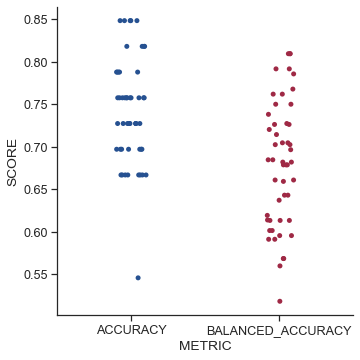

In [43]:
visualize_accuracy_metrics(
    predator.eval_valid.scores["feature_selected_scoring"]["acc_scores"], 
    predator.eval_valid.scores["feature_selected_scoring"]["balan_acc_scores"],
    kind='strip'
)

In [44]:
predator.run_evaluate_valid(models_type='tuned')

2021-09-28 04:43:44 | DEBUG    | helpers.helpers_predator.evaluation | Training on train set and measuring performance by predicting on validation set.
2021-09-28 04:43:44 | DEBUG    | helpers.helpers_predator.evaluation | Evaluating with tuned models.
2021-09-28 04:43:44 | DEBUG    | helpers.helpers_predator.evaluation | Determined features: 
['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'Model/DOPE_score']


  0%|          | 0/50 [00:00<?, ?it/s]

-------- EXPERIMENT:  1 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                       min_samples_split=5, n_estimators=50, random_state=1)
Accuracy score		: 0.7576
Balanced accuracy score : 0.7024
-------- EXPERIMENT:  2 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2)
Accuracy score		: 0.6970
Balanced accuracy score : 0.6726
-------- EXPERIMENT:  3 --------
X_train.shape=(131, 10), y_train.shape=(131,), X_valid.shape=(33, 10), y_valid.shape=(33,)
Classifier: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=25, random_state=3)
Accuracy score		: 0.7576
Balanced accuracy score : 0.7202
-------- 

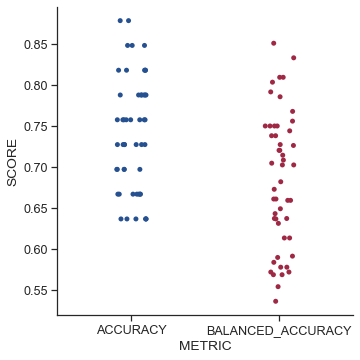

In [45]:
visualize_accuracy_metrics(
    predator.eval_valid.scores["finalized_scoring"]["acc_scores"], 
    predator.eval_valid.scores["finalized_scoring"]["balan_acc_scores"],
    kind='strip'
)

,Experiment,Acc_scores,Balan_acc_scores,Models_type
0,0,0.757576,0.702381,Tuned+FeatureSelected
1,1,0.696970,0.672619,Tuned+FeatureSelected
2,2,0.757576,0.720238,Tuned+FeatureSelected
3,3,0.878788,0.833333,Tuned+FeatureSelected
4,4,0.787879,0.726190,Tuned+FeatureSelected
5,5,0.787879,0.708333,Tuned+FeatureSelected
6,6,0.818182,0.750000,Tuned+FeatureSelected
7,7,0.787879,0.704545,Tuned+FeatureSelected
8,8,0.636364,0.568182,Tuned+FeatureSelected
9,9,0.727273,0.714286,Tuned+FeatureSelected


       Experiment  Acc_scores  Balan_acc_scores
count    50.00000   50.000000         50.000000
mean     24.50000    0.740606          0.683885
std      14.57738    0.069307          0.082390
min       0.00000    0.636364          0.535714
25%      12.25000    0.674242          0.617560
50%      24.50000    0.742424          0.692100
75%      36.75000    0.787879          0.748512
max      49.00000    0.878788          0.851190
2021-09-28 04:43:55 | INFO     | helpers.helpers_predator.evaluation | balanced_acc_threshold: 0.6175595238095238
2021-09-28 04:43:55 | INFO     | helpers.helpers_predator.evaluation | bad_models_ix: [8, 10, 13, 14, 15, 18, 33, 37, 40, 41, 44, 46, 48]
2021-09-28 04:43:55 | INFO     | helpers.helpers_predator.evaluation | qualified_models_ix: [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 42, 43, 45, 47, 49]
                                 Number of Model
Tuned+FeatureSelected              

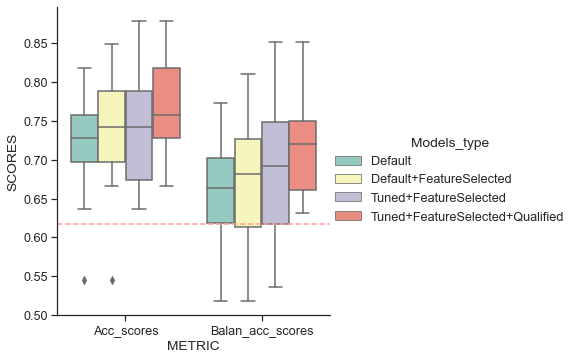

In [46]:
predator.compare_tuned_models(kind='box')

In [47]:
# cok fazla increasing olan modeling acc ve balance acc score kac?

In [48]:
# threshold balanced accuracy drop remaining models. (drop lowest 25% (or 10%) of models ) 

In [49]:
# her model class probability prediction yaptigimizda avg yerine median.

In [50]:
predator.eval_valid.comparison_data

Models_type,Default,Default+FeatureSelected,Tuned+FeatureSelected,Tuned+FeatureSelected+Qualified
Acc_scores,0.728485,0.741818,0.740606,0.769861
Balan_acc_scores,0.663214,0.679675,0.683885,0.721116


In [51]:
print(len(predator.default_models))
pprint(predator.default_models[:3])
print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  ')
print(len(predator.tuned_models))
pprint(predator.tuned_models[:3])
print(' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  ')
print(len(predator.qualified_models))
pprint(predator.qualified_models[:3])

50
[RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42)]
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
50
[RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                       min_samples_split=5, n_estimators=50, random_state=1),
 RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2),
 RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=25, random_state=3)]
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
37
[RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                       min_samples_split=5, n_estimators=50, random_state=1),
 RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2),
 RandomForestClassifier(class_weight='balanced', m

In [52]:
print(len(predator.qualified_models))
predator.qualified_models == predator.eval_valid.qualified_models

37


True

In [53]:
# print(df['Acc_scores'].mean())
# print(df['Balan_acc_scores'].mean())
# print(df['Acc_scores'].median())
# print(df['Balan_acc_scores'].median())

In [54]:
predator.data_materials["ov"].duplicated().sum()

41

In [55]:
print(predator.data_materials["ov"].shape)
predator.data_materials["ov"].head(3)

(5086, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


In [56]:
predator.data_materials['target_ov_data'].duplicated().sum()

50

In [57]:
predator.data_materials['target_ov_data'].head(3)

,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,D59E,P52565,0.9263,0.915529,0.9394,0.914711,1.492640,0.999329,0.046801,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.880,3.18062,3.18062
1,P08134,D59E,P52565-2,0.9263,0.915529,0.7222,0.708487,0.762694,0.999029,0.004062,...,344.0,62.3140,63.0691,32.5038,32.5038,598.710,417.740,1016.460,3.80414,3.80414
2,P62993,A3V,Q9H8V3-2,0.4444,0.463595,0.2792,0.262235,1.964490,-0.080548,0.456549,...,280.0,23.2774,24.5177,122.5120,122.5120,170.810,120.515,291.325,4.63364,4.63364


## Fit Finalized Models

For each experiment, the **hyper-tuned** models are fitted with **all of training** data. These models then will be used to make prediction on TCGA Cancer Datasets.

In [58]:
predator.fit_finalized_models()

2021-09-28 04:43:57 | DEBUG    | Predator | Fitting finalized models with all training data ..
2021-09-28 04:43:57 | INFO     | Predator | Model elimination: True
2021-09-28 04:43:57 | INFO     | Predator | Using 37 qualified models as finalized models.


  0%|          | 0/37 [00:00<?, ?it/s]

In [59]:
print(predator.n_experiment)
print(predator.n_models)

50
37


## Prediction TCGA on Cancer Datasets

In [60]:
predator.initialize_target_data_materials()

2021-09-28 04:44:06 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-09-28 04:44:06 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'Model/DOPE_score']
2021-09-28 04:44:06 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_ov data materials  ..


### Voting mode: `hard`

In [61]:
predator.predict(voting='hard')

2021-09-28 04:44:06 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-09-28 04:44:06 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-09-28 04:44:06 | DEBUG    | helpers.helpers_predator.models | Voting mode: hard
2021-09-28 04:44:06 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsHard
2021-09-28 04:44:06 | DEBUG    | Predator | Predicting on ov cohort ..
2021-09-28 04:44:06 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                       min_samples_split=5, n_estimators=50, random_state=1)
2021-09-28 04:44:06 | DEBUG    | helpers.helpers_predator.models | X shape: (5086, 10)
2021-09-28 04:44:06 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2)
2021-09-28 04:44:06 | DEBUG    | helpers.helpers_predator.models | X shap

In [62]:
predator.predictions.keys()

dict_keys(['ov'])

In [63]:
# Predictions for first 10 experiment.
predator.predictions["ov"][:3]

[array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64)]

2021-09-28 04:44:09 | DEBUG    | helpers.helpers_predator.predictions | Initializing value counts ..


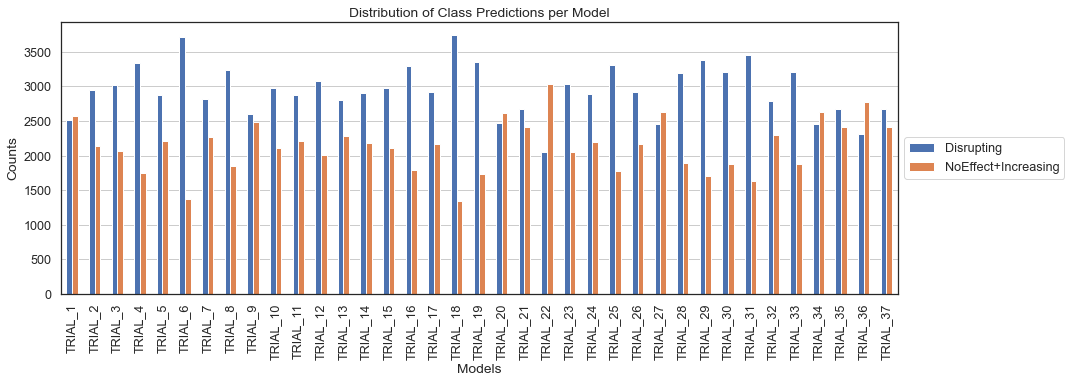

In [64]:
predator.predictions.plot_predictions_distributions("ov")

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{0, 1 or "NoVote"} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries which predicted as both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may be classified both 0 and 1. We drop such instances.

In [65]:
predator.predictions_post_process()

2021-09-28 04:44:10 | DEBUG    | helpers.helpers_predator.predictions | PredictionsHard
2021-09-28 04:44:10 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort ov ..
2021-09-28 04:44:10 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with ov cancer dataset ..
2021-09-28 04:44:10 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-09-28 04:44:21 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 359): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0           0  O75175    Q684H     Q9NZN8
1           1  O75175    Q684H     Q9NZN8
2           1  O75175    Q684H     Q9NZN8
3           1  O75175    Q684H     Q9NZN8
4           1  O75175    Q684H     Q9NZN8
2021-09-28 04:44:32 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 776): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0           0  O75175    Q684H     Q9NZN8
1           0  O75175    Q684H     Q9NZN8
2           0  O75175    Q684H     Q9NZN8
3           1  O75175    Q684H     Q9NZN8
4           0  O75175    Q684H     Q9NZN8
2021-09-28 04:44:43 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 730): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0           1  P07332    N695H     P08581
1           0  P07332    N695H     P08581
2      

In [66]:
predator.predictions.keys()

dict_keys(['ov', 'ov_predicted_datasets', 'ov_predicted_valid_datasets', 'ov_predicted_invalid_datasets', 'ov_finalized_prediction_dataframes'])

In [68]:
predator.predictions["ov_predicted_datasets"][0].head(3)

,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,1,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


In [69]:
predator.predictions["ov_predicted_datasets"][17].head(3)

,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,1,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


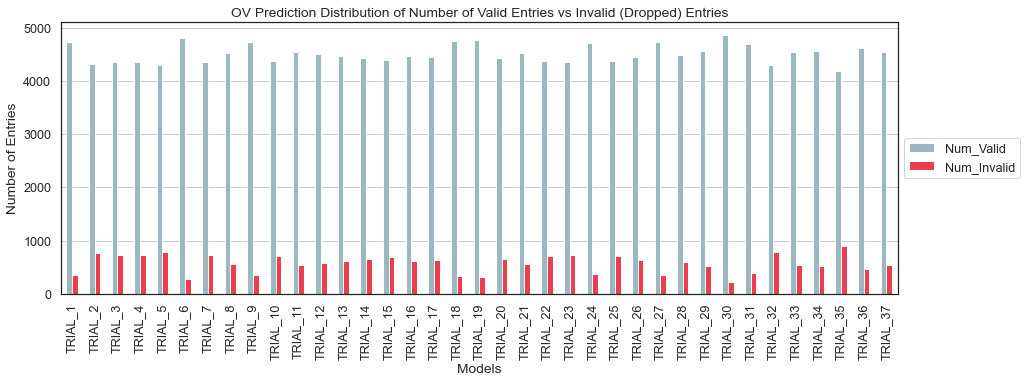

In [70]:
predator.predictions.plot_distribution_valid_vs_invalid("ov")

2021-09-28 04:56:16 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the unique (protein, mutation, interactor) triplets which had valid prediction.


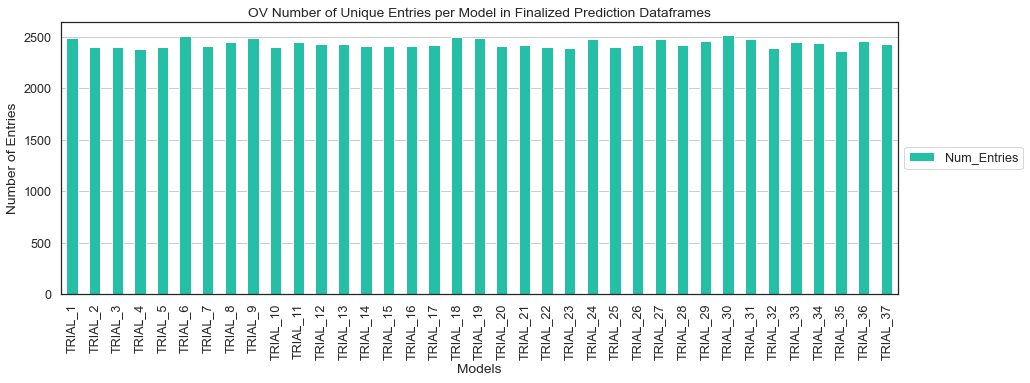

In [71]:
predator.predictions.plot_num_finalized_predictions("ov")

In [72]:
predator.prepare_ensemble_prediction_data()

2021-09-28 04:56:19 | DEBUG    | helpers.helpers_predator.predictions | PredictionsHard
2021-09-28 04:56:19 | DEBUG    | helpers.helpers_predator.predictions | Preparing ensemble prediction data for ov ..


  0%|          | 0/2578 [00:00<?, ?it/s]

2021-09-28 04:58:48 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for ov is prepared.
2021-09-28 04:58:48 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for ov.
Accessible from predictions.['ov_prediction_results']
2021-09-28 04:58:48 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for ov.
Accessible from predictions.['ov_prediction_results_no_votes_dropped']


In [73]:
predator.predictions["ov_ensemble_prediction_data"].head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Num_preds_0,Num_preds_1,Num_preds_NO_VOTE,VOTED_PREDICTION
0,P08134,D59E,P52565,36,0,1,0
1,P62993,A3V,Q9H8V3,24,13,0,0
2,P62993,A3V,Q14155,17,20,0,1
3,O75175,Q684H,Q9NZN8,32,1,4,0
4,O75175,Q684H,B2RDX7,36,1,0,0


In [74]:
print(predator.data_materials["ov"].shape)
predator.data_materials["ov"].head()

(5086, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364
3,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,SH3_1,...,256.0,22.7168,24.4422,101.6580,101.6580,134.58,132.565,267.145,4.85917,4.85917
4,O75175,O75175,Q684H,done,interface,COSM70220,-,-,NOT2_3_5,NOT2_3_5,...,259.0,23.4198,26.8851,28.5382,28.5382,1189.15,702.87,1892.02,3.67615,2.21333


In [75]:
print(predator.data_materials["Xs_ov"][0].shape)
predator.data_materials["Xs_ov"][0].head()

(5086, 10)


,Provean_score,EL2_score,Final_ddG,Interactor_alignment_score,Matrix_score,Solvent_accessibility_wt,Solvent_accessibility_mut,van_der_waals_mut,Interactor_template_sequence_identity,Model/DOPE_score
0,-3.575,2.100875,1.492640,0.914711,1.0,2.776620,2.114950,-29.31280,0.9394,-0.933072
1,-3.575,2.286398,0.762694,0.708487,1.0,2.382430,2.153380,-22.65540,0.7222,-0.573655
2,-3.110,-1.475353,1.964490,0.262235,0.0,0.394442,0.281167,-6.95953,0.2792,-0.590484
3,-3.110,-1.897693,-0.135782,0.227069,0.0,1.337750,1.336440,-6.22762,0.2128,-0.541347
4,-4.683,1.863714,1.037040,1.000000,1.0,17.408100,28.193400,-48.71900,1.0000,-0.587948


In [76]:
predator.data_materials["Xs_ov"][0].iloc[[0]]

,Provean_score,EL2_score,Final_ddG,Interactor_alignment_score,Matrix_score,Solvent_accessibility_wt,Solvent_accessibility_mut,van_der_waals_mut,Interactor_template_sequence_identity,Model/DOPE_score
0,-3.575,2.100875,1.49264,0.914711,1.0,2.77662,2.11495,-29.3128,0.9394,-0.933072


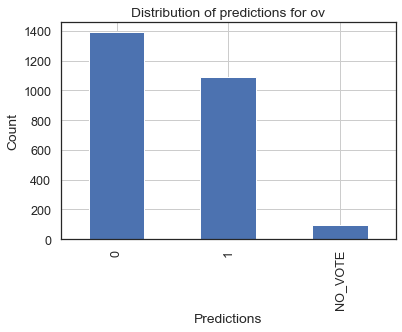

In [77]:
predator.predictions.plot_ensemble_prediction_distribution("ov")

In [78]:
brca_prediction_results_hard = predator.predictions["ov_prediction_results"]
brca_prediction_results_hard.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1
3,O75175,Q684H,Q9NZN8,0
4,O75175,Q684H,B2RDX7,0


In [79]:
brca_prediction_results_hard_no_votes_dropped = predator.predictions["ov_prediction_results_no_votes_dropped"]

Label counts:
Disrupting                1392
Increasing + No Effect    1089
Name: Prediction, dtype: int64


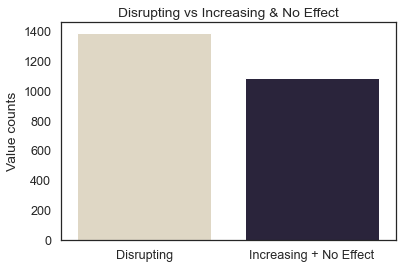

In [80]:
visualize_label_counts(brca_prediction_results_hard_no_votes_dropped, 'Prediction')

In [82]:
brca_ensemble_prediction_data_hard = predator.predictions["ov_ensemble_prediction_data"]

In [84]:
#######
hard_brca_predicted_valid_datasets = predator.predictions[f"ov_predicted_valid_datasets"]
hard_brca_predicted_invalid_datasets = predator.predictions[f"ov_predicted_invalid_datasets"]

### Voting mode: `soft`

In [85]:
predator.initialize_target_data_materials()

2021-09-28 05:04:38 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-09-28 05:04:38 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'Model/DOPE_score']
2021-09-28 05:04:38 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_ov data materials  ..


In [86]:
predator.predict(voting='soft')

2021-09-28 05:04:39 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-09-28 05:04:39 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-09-28 05:04:39 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2021-09-28 05:04:39 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2021-09-28 05:04:39 | DEBUG    | Predator | Predicting on ov cohort ..
2021-09-28 05:04:39 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                       min_samples_split=5, n_estimators=50, random_state=1)
2021-09-28 05:04:39 | DEBUG    | helpers.helpers_predator.models | X shape: (5086, 10)
2021-09-28 05:04:39 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2)
2021-09-28 05:04:39 | DEBUG    | helpers.helpers_predator.models | X shap

In [87]:
predator.predictions.keys()

dict_keys(['ov_prob'])

In [88]:
# Predictions for first 10 experiment.
predator.predictions["ov_prob"][:3]

[array([[0.74189909, 0.25810091],
        [0.68663109, 0.31336891],
        [0.45038587, 0.54961413],
        ...,
        [0.71643212, 0.28356788],
        [0.6309161 , 0.3690839 ],
        [0.71118139, 0.28881861]]),
 array([[0.6125699 , 0.3874301 ],
        [0.73938666, 0.26061334],
        [0.46093971, 0.53906029],
        ...,
        [0.83785925, 0.16214075],
        [0.74708342, 0.25291658],
        [0.66366035, 0.33633965]]),
 array([[0.83003883, 0.16996117],
        [0.96933555, 0.03066445],
        [0.42633114, 0.57366886],
        ...,
        [0.83897755, 0.16102245],
        [0.83606272, 0.16393728],
        [0.83606272, 0.16393728]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

--- todo  add documentation

In [89]:
predator.predictions_post_process()

2021-09-28 05:04:56 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-09-28 05:04:56 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort ov ..
2021-09-28 05:04:56 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-09-28 05:04:56 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with ov cancer dataset ..
2021-09-28 05:04:56 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-09-28 05:05:09 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 359): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.465187  O75175    Q684H     Q9NZN8
1    0.553470  O75175    Q684H     Q9NZN8
2    0.537381  O75175    Q684H     Q9NZN8
3    0.526089  O75175    Q684H     Q9NZN8
4    0.553470  O75175    Q684H     Q9NZN8
2021-09-28 05:05:22 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 776): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.255194  O75175    Q684H     Q9NZN8
1    0.452007  O75175    Q684H     Q9NZN8
2    0.383825  O75175    Q684H     Q9NZN8
3    0.513785  O75175    Q684H     Q9NZN8
4    0.452007  O75175    Q684H     Q9NZN8
2021-09-28 05:05:34 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 730): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.593597  P07332    N695H     P08581
1    0.417783  P07332    N695H     P08581
2    0.

In [90]:
predator.predictions.keys()

dict_keys(['ov_prob', 'ov_predicted_probs_datasets', 'ov_predicted_valid_datasets', 'ov_predicted_invalid_datasets', 'ov_finalized_prediction_dataframes'])

In [91]:
predator.predictions["ov_predicted_valid_datasets"][1]

,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.387430,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,0.260613,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,0.539060,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364
3,0.613663,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,256.0,22.7168,24.4422,101.6580,101.6580,134.58,132.565,267.145,4.85917,4.85917
4,0.288562,O75175,O75175,Q684H,done,interface,COSM70220,-,-,NOT2_3_5,...,259.0,19.6132,25.0922,21.3671,21.3671,1139.83,679.33,1819.17,3.30883,2.53006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,0.251065,P62942,P62942,F100L,done,interface,COSM1410408,-,-,FKBP_C,...,430.0,41.1523,40.8079,69.2891,69.2891,373.13,190.05,563.175,3.30680,4.69282
4306,0.355373,P62942,P62942,F100L,done,interface,COSM1410408,-,-,FKBP_C,...,471.0,37.5525,36.9830,427.7180,427.7180,397.955,189.41,587.365,3.33524,4.82812
4307,0.162141,P62942,P62942,F100L,done,interface,COSM1410408,-,-,FKBP_C,...,430.0,47.6627,47.0285,74.1177,74.1177,364.3,192.855,557.16,3.31893,4.82691
4308,0.252917,P62942,P62942,F100L,done,interface,COSM1410408,-,-,FKBP_C,...,430.0,39.6905,41.1091,86.3923,86.3923,420.355,190.63,610.98,4.73570,6.45311


In [92]:
predator.predictions["ov_finalized_prediction_dataframes"][1]

,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.387430,P08134,D59E,P52565
1,0.260613,P08134,D59E,P52565
2,0.539060,P62993,A3V,Q9H8V3
3,0.613663,P62993,A3V,Q14155
4,0.288562,O75175,Q684H,B2RDX7
...,...,...,...,...
3051,0.251065,P62942,F100L,P36896
3052,0.355373,P62942,F100L,P36896
3053,0.162141,P62942,F100L,P36896
3054,0.252917,P62942,F100L,P37023


In [93]:
predator.predictions["ov_predicted_probs_datasets"][0].head(3)

,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.258101,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,0.313369,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,0.549614,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


In [94]:
predator.predictions["ov_predicted_probs_datasets"][17].head(3)

,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.239124,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,0.236576,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,0.649906,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


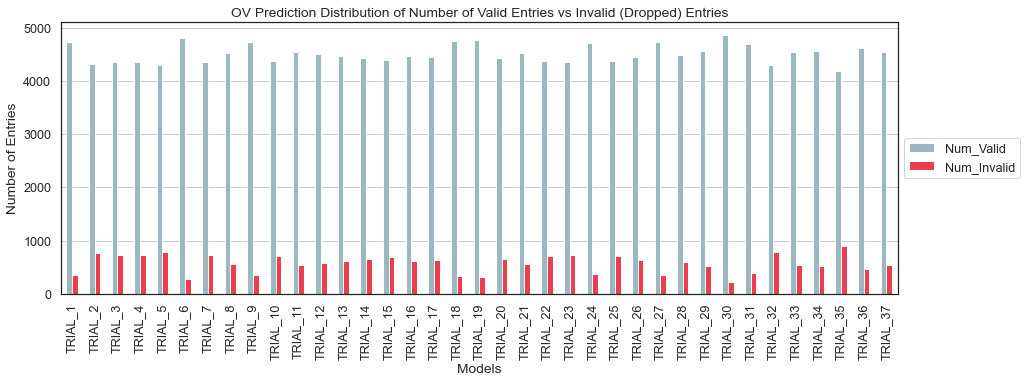

In [95]:
predator.predictions.plot_distribution_valid_vs_invalid("ov")

2021-09-28 05:12:17 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the unique (protein, mutation, interactor) triplets which had valid prediction.


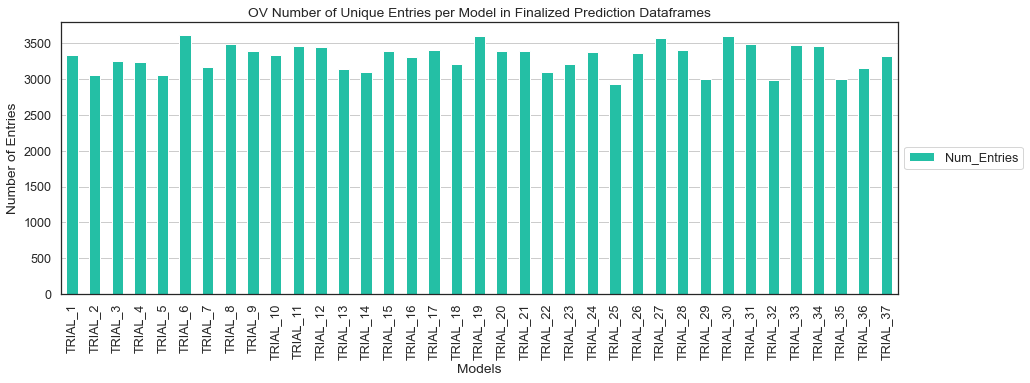

In [96]:
# ????, why goes up to 3500?
predator.predictions.plot_num_finalized_predictions("ov")

In [97]:
predator.predictions['ov_finalized_prediction_dataframes'][0].head()

,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.258101,P08134,D59E,P52565
1,0.313369,P08134,D59E,P52565
2,0.549614,P62993,A3V,Q9H8V3
3,0.554122,P62993,A3V,Q14155
4,0.493789,O75175,Q684H,B2RDX7


In [98]:
predator.prepare_ensemble_prediction_data()

2021-09-28 05:12:18 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2021-09-28 05:12:18 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for ov taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-09-28 05:14:51 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for ov is prepared.
Accessible from `ov_predictions_prob_data`.
2021-09-28 05:14:51 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for ov is prepared.
Accessible from `ov_ensemble_prediction_data`.
2021-09-28 05:14:51 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for ov.
Accessible from predictions.['ov_prediction_results']
2021-09-28 05:14:51 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for ov.
Accessible from predictions.['ov_prediction_results_no_votes_dropped']


In [99]:
predator.predictions['ov_predictions_prob_data'].head()

,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.285735,0.324022,0.100313,0.183961,0.34,0.33657,0.249208,0.203588,0.461873,0.196921,...,0.327551,0.289581,0.113124,0.226729,0.454805,0.34616,0.459367,0.303253,0.26787,0
1,0.549614,0.53906,0.573669,0.536013,0.32,0.416451,0.545645,0.378409,0.595046,0.524716,...,0.458546,0.359192,0.328969,0.306549,0.53143,0.413095,0.499573,0.405714,0.45855,0
2,0.554122,0.613663,0.498702,0.242433,0.28,0.495152,0.725,0.503368,0.623617,0.421751,...,0.562074,0.490024,0.491228,0.342821,0.633458,0.6,0.61922,0.435556,0.50337,1
3,NO_VOTE,NO_VOTE,0.234841,0.281853,0.293333,0.3543,0.258622,0.269698,0.434223,0.357858,...,0.262184,0.405717,NO_VOTE,0.270541,0.444653,0.416692,0.393069,0.292945,0.3483,0
4,0.493789,0.288562,0.203138,0.21028,0.2,0.336079,0.317828,0.295158,0.438739,0.295844,...,0.254765,0.422937,0.21844,0.265429,0.439019,0.471979,0.375909,0.250706,0.29584,0


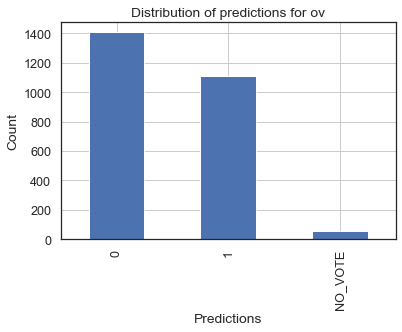

In [100]:
predator.predictions.plot_ensemble_prediction_distribution("ov")

In [101]:
brca_prediction_results_soft = predator.predictions['ov_prediction_results']
brca_prediction_results_soft.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1
3,O75175,Q684H,Q9NZN8,0
4,O75175,Q684H,B2RDX7,0


In [102]:
brca_prediction_results_soft_no_votes_dropped = predator.predictions["ov_prediction_results_no_votes_dropped"]
brca_prediction_results_soft_no_votes_dropped.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1
3,O75175,Q684H,Q9NZN8,0
4,O75175,Q684H,B2RDX7,0


Label counts:
Disrupting                1410
Increasing + No Effect    1110
Name: Prediction, dtype: int64


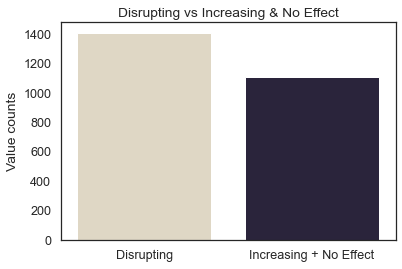

In [103]:
visualize_label_counts(brca_prediction_results_soft_no_votes_dropped, 'Prediction')

In [104]:
brca_ensemble_prediction_data_soft = predator.predictions["ov_ensemble_prediction_data"]

In [105]:
brca_predictions_prob_data_soft = predator.predictions["ov_predictions_prob_data"]

In [106]:
#######
soft_brca_predicted_valid_datasets = predator.predictions[f"ov_predicted_valid_datasets"]
soft_brca_predicted_invalid_datasets = predator.predictions[f"ov_predicted_invalid_datasets"]

## Exporting Predictions

In [107]:
# brca_prediction_results = brca_prediction_results_hard_no_votes_dropped
brca_prediction_results = brca_prediction_results_soft_no_votes_dropped
brca_prediction_results.shape

(2520, 4)

In [108]:
brca_prediction_results.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1
3,O75175,Q684H,Q9NZN8,0
4,O75175,Q684H,B2RDX7,0


In [109]:
from helpers.helpers_predator.common import export_data

In [110]:
DATA_FOLDER_PATH = "../data/predictions_datasets/"

In [111]:
predator.export_prediction(
    tcga="ov",
    data=brca_prediction_results,
    file_name="predictions",
    folder_path=DATA_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2021-09-28 05:14:53 | DEBUG    | helpers.helpers_predator.common | Results folder with ID d872749a is created.
2021-09-28 05:14:53 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder ov_prediction_2021-09-28\d872749a..
2021-09-28 05:14:53 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/ov_prediction_2021-09-28\d872749a\predictions_soft_2021-09-28.csv is exported successfully.
2021-09-28 05:14:53 | DEBUG    | helpers.helpers_predator.common | Config is exported.


In [ ]:
# todo, some variable names stayed as brca, but i'll change it later.

# The End

**Later**

Maybe as number of experiment goes to positive infinity, the class 0 and class 1 distribution gets equals. 

After looking at ROC Curves, we can decide to assign class 0 if we are very confident, i.e. prediction probability above some
threshold, rather than 0.50